Classificação de Texto Multilabel


José Augusto de Almeida Neto


## Importar bibliotecas


In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carregar datasets


In [107]:
# Carregar dataset
name = 'teste1'
df_case_study = pd.read_csv(f'../datasets/dataset-case_study-{name}.csv')
df_predictions = pd.read_csv(f'../datasets/dataset-case_study_predictions-{name}.csv')

In [108]:
df_results = df_case_study.join(df_predictions.astype(int))
df_results

,restaurante_name,user_name,review_date,stars,comment_text,year,platform,language,comment_text_translated,ambiente,bebida,comida,geral,localização,outros,preço,serviço
0,cipriani,Viva Gastronomia,9 anos atrás no Zomato,1,Hotelaria e gastronomia são duas artes demand...,2015,Zomato,pt,hotelaria e gastronomia são dua art demandam m...,0,0,1,0,0,0,0,0
1,cipriani,Аннa Шкаленкова,11 dias atrás no Google,1,It was possible to order only a tasting menu;...,2024,Google,en,foi possível encomendar apena um menu de degus...,0,0,1,1,0,0,0,1
2,cipriani,Roberto Barretto,um mês atrás no Google,1,Grade 10! Food: 5 Service: 4 Atmosph...,Unknown,Google,en,grade 10 !,0,0,0,1,0,0,0,0
3,cipriani,GRUPO VANDERSON SOARES,um mês atrás no Google,1,Wonderful Food: 5 Service: 5 Atmosp...,Unknown,Google,en,comida maravilhosa,1,0,1,0,0,0,0,1
4,cipriani,Maria Baptista,um mês atrás no Google,1,We had a great dining experience at Cipriani....,Unknown,Google,en,tivemo uma ótima experiência gastronômica em c...,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,tangara,Christopher Lopez,4 anos atrás no Google,1,Great place for lunch. Nice scenary good wine ...,2020,Google,en,ótimo lugar para o almoço.lista de vinho de bo...,0,0,0,0,0,0,0,0
4967,tangara,Silvio Marcos,4 anos atrás no Google,1,Boa comida. Sabor marcante,2020,Google,pt,boa comida . sabor marcant,0,0,0,1,0,0,0,0
4968,tangara,Maria Lins,4 anos atrás no Google,1,Comida divina,2020,Google,it,comida divina,0,0,1,1,0,0,0,0
4969,tangara,Ricardo Polisel Alves,5 anos atrás no Foursquare,0,Tasting Menu was indeed very good. Service wa...,2019,Foursquare,en,o menu de degustação foi realment muito bom.o ...,1,0,1,0,0,0,0,1


## Análise dos resultados

In [109]:
labels = ['ambiente', 'bebida', 'comida', 'geral',
          'localização', 'outros', 'preço', 'serviço']
# Obter dataset com somente com os comentários que não foram classificados
not_classified = df_results[df_results[labels].eq(0).all(axis=1)]
print('Total de comentários não classificados:', len(not_classified))

Total de comentários não classificados: 25


### Tabela de resultados por plataforma

In [110]:
# Agrupar por plataforma
df_platforms = df_results.groupby('platform')[labels].sum()

# Criar coluna com o tema mais repetido
max_col = df_platforms.iloc[:, 1:].idxmax(axis=1)
df_platforms['tema mais repetido'] = max_col

# Criar coluna com número total de temas por plataforma
df_platforms['total de temas assinalados'] = df_platforms[labels].sum(axis=1)

# Ordenar restaurantes por quantidades de temas assinalados
df_platforms = df_platforms.sort_values(by='total de temas assinalados', ascending=False)
df_platforms.reset_index(inplace=True)

df_platforms

,platform,ambiente,bebida,comida,geral,localização,outros,preço,serviço,tema mais repetido,total de temas assinalados
0,Google,641,290,2440,1228,45,152,570,1524,comida,6890
1,Foursquare,159,62,545,285,13,34,153,365,comida,1616
2,Facebook,124,41,531,274,10,42,110,333,comida,1465
3,Yelp,61,29,210,110,4,21,46,144,comida,625
4,Zomato,5,2,14,9,0,1,7,12,comida,50
5,Restaurant Guru,0,0,0,1,0,0,0,0,geral,1


In [111]:
# Substituir valores por valores em porcentagem
total = df_platforms['total de temas assinalados']
df_platforms_porcent = df_platforms.copy()

df_platforms_porcent[labels] = df_platforms_porcent[labels].apply(lambda x: x/total).applymap(lambda x: "{:.2%}".format(x) if isinstance(x, (int, float)) and x > 0 else x)

df_platforms_porcent.drop(['tema mais repetido'], axis=1).drop(['total de temas assinalados'], axis=1)
df_platforms_porcent

C:\Users\José Neto\AppData\Local\Temp\ipykernel_15996\380853197.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_platforms_porcent[labels] = df_platforms_porcent[labels].apply(lambda x: x/total).applymap(lambda x: "{:.2%}".format(x) if isinstance(x, (int, float)) and x > 0 else x)


,platform,ambiente,bebida,comida,geral,localização,outros,preço,serviço,tema mais repetido,total de temas assinalados
0,Google,9.30%,4.21%,35.41%,17.82%,0.65%,2.21%,8.27%,22.12%,comida,6890
1,Foursquare,9.84%,3.84%,33.73%,17.64%,0.80%,2.10%,9.47%,22.59%,comida,1616
2,Facebook,8.46%,2.80%,36.25%,18.70%,0.68%,2.87%,7.51%,22.73%,comida,1465
3,Yelp,9.76%,4.64%,33.60%,17.60%,0.64%,3.36%,7.36%,23.04%,comida,625
4,Zomato,10.00%,4.00%,28.00%,18.00%,0.0,2.00%,14.00%,24.00%,comida,50
5,Restaurant Guru,0.0,0.0,0.0,100.00%,0.0,0.0,0.0,0.0,geral,1


In [112]:
# Converter as porcentagens para tipo numérico
df_grafico = df_platforms_porcent.drop(['tema mais repetido', 'total de temas assinalados'], axis=1)
df_grafico[labels] = df_grafico[labels].apply(lambda x: x.str.rstrip('%').astype(float))

# Substituir NaN por 0
df_grafico = df_grafico.fillna(0)

# Remover linhas onde a coluna platform é "Restaurant Guru"
df_grafico = df_grafico[df_grafico['platform'] != 'Restaurant Guru']
df_grafico.reset_index(drop=True, inplace=True)

porcentagens = df_grafico[labels]

C:\Users\José Neto\AppData\Local\Temp\ipykernel_15996\20450251.py:14: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=porcentagens, color='0.8', scale='count', zorder=1)
C:\Users\José Neto\AppData\Local\Temp\ipykernel_15996\20450251.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])


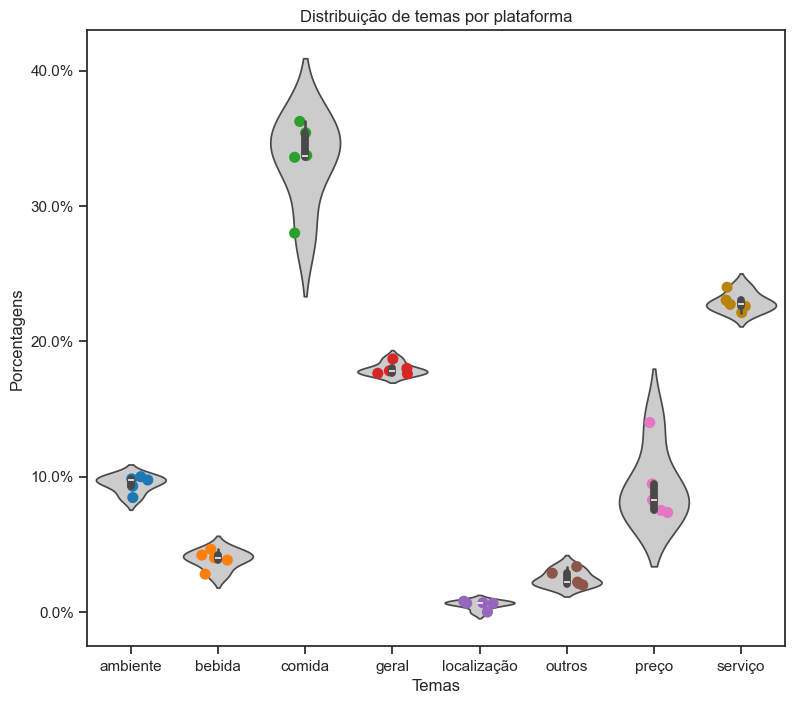

In [113]:
# Configurar o estilo do Seaborn
sns.set(style='ticks')

# Criar uma nova figura com um tamanho maior
plt.figure(figsize=(9,8))  # Ajuste as dimensões conforme necessário

# Definir a nova paleta de cores
paleta = sns.color_palette(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#b8850a'])

# Plotar o gráfico de dispersão com a nova paleta de cores
sns.stripplot(data=porcentagens, jitter=0.2, size=8, zorder=2, palette=paleta)

# Plotar o gráfico violino
sns.violinplot(data=porcentagens, color='0.8', scale='count', zorder=1)

# Configurar os rótulos dos eixos
plt.title('Distribuição de temas por plataforma')
plt.xlabel('Temas')
plt.ylabel('Porcentagens')
plt.xticks(range(len(labels)), labels)

# Adicionar o símbolo de porcentagem aos valores do eixo y
plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])

# Mostrar o gráfico
plt.show()


C:\Users\José Neto\AppData\Local\Temp\ipykernel_15996\1747188698.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])


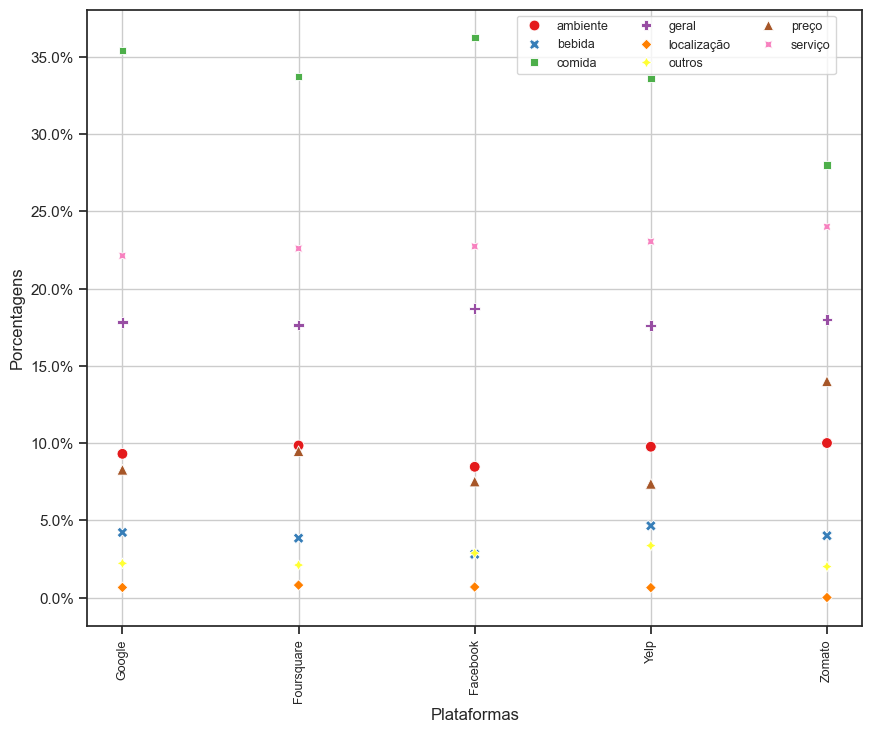

In [114]:
# Configurar o estilo do Seaborn
sns.set(style='ticks')

# Criar uma nova figura com um tamanho maior
plt.figure(figsize=(10, 8))  # Ajuste as dimensões conforme necessário

# Plotar o gráfico de dispersão
sns.scatterplot(data=porcentagens, palette='Set1', s=60)

# Configurar os rótulos dos eixos
plt.xlabel('Plataformas') 
plt.ylabel('Porcentagens')
plt.xticks(range(len(df_grafico)), df_grafico['platform'], rotation=90, fontsize=9)
# Adicionar o símbolo de porcentagem aos valores do eixo y
plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])

# Adicionar uma grade
plt.grid(True)

# Mover a legenda para a parte superior
plt.legend(loc='upper center', bbox_to_anchor=(0.76, 1), ncol=3, fontsize=9)

# Mostrar o gráfico
plt.show()

<Figure size 1200x800 with 0 Axes>

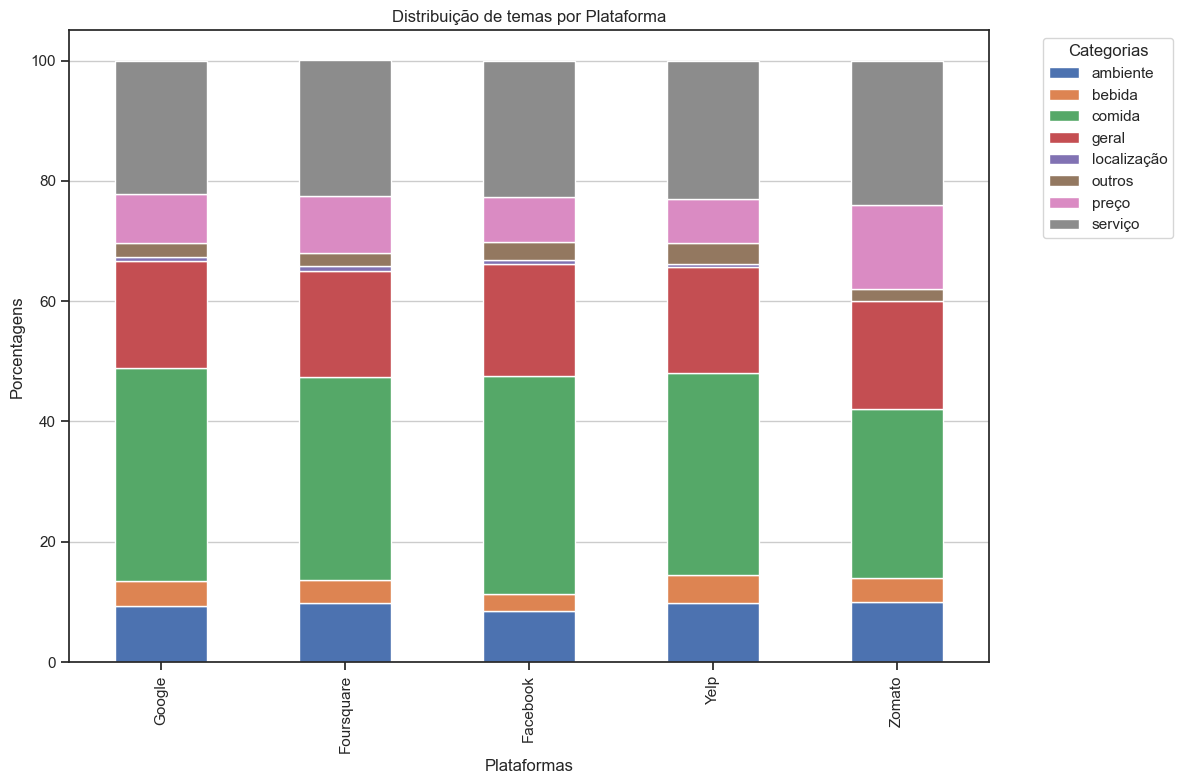

In [115]:
# Criar uma nova figura
plt.figure(figsize=(12, 8))

# Plotar gráfico de barras empilhadas
df_grafico.set_index('platform')[labels].plot(kind='bar', stacked=True, figsize=(12, 8))

# Configurar os rótulos dos eixos
plt.xlabel('Plataformas')
plt.ylabel('Porcentagens')
plt.title('Distribuição de temas por Plataforma')

# Adicionar legenda
plt.legend(title='Categorias', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar uma grade
plt.grid(True, axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Tabela de resultados por restaurante

In [116]:
# Agrupar por nome do restaurante
df_restaurants = df_results.groupby('restaurante_name')[labels].sum()

# Criar coluna com o tema mais repetido
max_col = df_restaurants.iloc[:, 1:].idxmax(axis=1)
df_restaurants['tema mais repetido'] = max_col

# Criar coluna com número total de temas por restaurante
df_restaurants['total de temas assinalados'] = df_restaurants[labels].sum(axis=1)

# Ordenar restaurantes por quantidades de temas assinalados
df_restaurants = df_restaurants.sort_values(by='total de temas assinalados', ascending=False)
df_restaurants.reset_index(inplace=True)

df_restaurants

,restaurante_name,ambiente,bebida,comida,geral,localização,outros,preço,serviço,tema mais repetido,total de temas assinalados
0,dom,192,88,745,358,8,52,163,469,comida,2075
1,kinoshita,115,47,421,196,9,24,98,264,comida,1174
2,mani,77,35,341,158,7,13,78,219,comida,928
3,huto,78,29,249,144,6,18,71,160,comida,755
4,lasai,57,38,252,144,5,22,65,161,comida,744
5,evvai,58,24,256,153,2,22,61,155,comida,731
6,picchi,68,22,255,136,6,21,54,160,comida,722
7,sakamoto,58,23,217,119,7,13,56,129,comida,622
8,mee,56,18,176,92,5,12,49,126,comida,534
9,tuju,52,18,161,76,3,10,34,120,comida,474


In [117]:
# Substituir valores por valores em porcentagem
total = df_restaurants['total de temas assinalados']
df_restaurants_porcent = df_restaurants.copy()

df_restaurants_porcent[labels] = df_restaurants_porcent[labels].apply(lambda x: x/total).applymap(lambda x: "{:.2%}".format(x) if isinstance(x, (int, float)) and x > 0 else x)

df_restaurants_porcent.drop(['tema mais repetido'], axis=1).drop(['total de temas assinalados'], axis=1)
df_restaurants_porcent

C:\Users\José Neto\AppData\Local\Temp\ipykernel_15996\2825921075.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_restaurants_porcent[labels] = df_restaurants_porcent[labels].apply(lambda x: x/total).applymap(lambda x: "{:.2%}".format(x) if isinstance(x, (int, float)) and x > 0 else x)


,restaurante_name,ambiente,bebida,comida,geral,localização,outros,preço,serviço,tema mais repetido,total de temas assinalados
0,dom,9.25%,4.24%,35.90%,17.25%,0.39%,2.51%,7.86%,22.60%,comida,2075
1,kinoshita,9.80%,4.00%,35.86%,16.70%,0.77%,2.04%,8.35%,22.49%,comida,1174
2,mani,8.30%,3.77%,36.75%,17.03%,0.75%,1.40%,8.41%,23.60%,comida,928
3,huto,10.33%,3.84%,32.98%,19.07%,0.79%,2.38%,9.40%,21.19%,comida,755
4,lasai,7.66%,5.11%,33.87%,19.35%,0.67%,2.96%,8.74%,21.64%,comida,744
5,evvai,7.93%,3.28%,35.02%,20.93%,0.27%,3.01%,8.34%,21.20%,comida,731
6,picchi,9.42%,3.05%,35.32%,18.84%,0.83%,2.91%,7.48%,22.16%,comida,722
7,sakamoto,9.32%,3.70%,34.89%,19.13%,1.13%,2.09%,9.00%,20.74%,comida,622
8,mee,10.49%,3.37%,32.96%,17.23%,0.94%,2.25%,9.18%,23.60%,comida,534
9,tuju,10.97%,3.80%,33.97%,16.03%,0.63%,2.11%,7.17%,25.32%,comida,474


In [118]:
# Converter as porcentagens para tipo numérico
df_grafico = df_restaurants_porcent.drop(['tema mais repetido', 'total de temas assinalados'], axis=1)
df_grafico[labels] = df_grafico[labels].apply(lambda x: x.str.rstrip('%').astype(float))

# Substituir NaN por 0
df_grafico = df_grafico.fillna(0)

# Remover linhas onde a coluna platform é "Restaurant Guru"
df_grafico = df_grafico[df_grafico['restaurante_name'] != 'Restaurant Guru']
df_grafico.reset_index(drop=True, inplace=True)

porcentagens = df_grafico[labels]

C:\Users\José Neto\AppData\Local\Temp\ipykernel_15996\452050869.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])


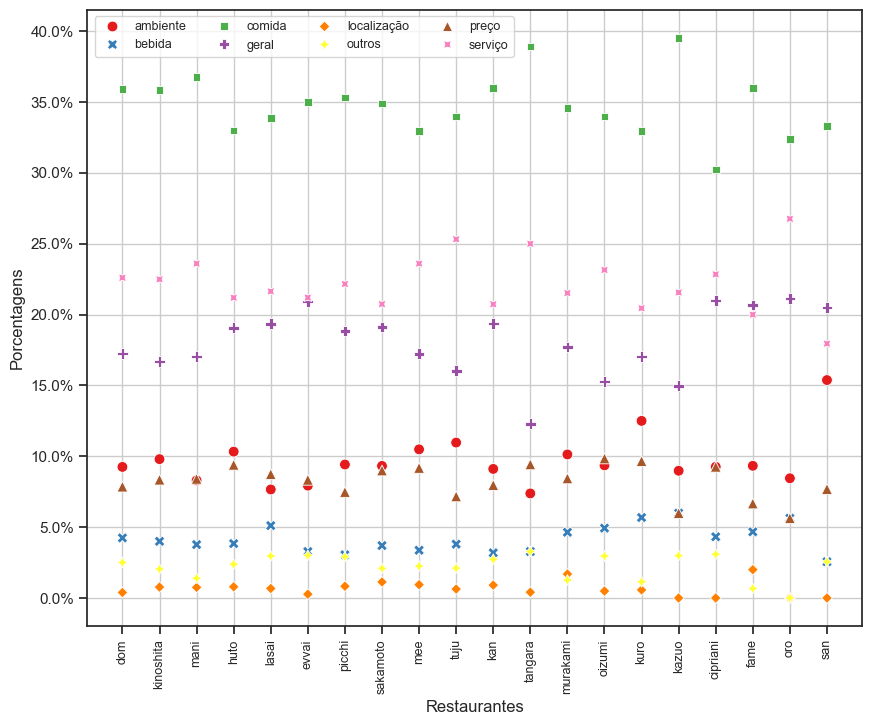

In [119]:
# Configurar o estilo do Seaborn
sns.set(style='ticks')

# Criar uma nova figura com um tamanho maior
plt.figure(figsize=(10, 8))  # Ajuste as dimensões conforme necessário

# Plotar o gráfico de dispersão
sns.scatterplot(data=porcentagens, palette='Set1', s=60)

# Configurar os rótulos dos eixos
plt.xlabel('Restaurantes') 
plt.ylabel('Porcentagens')
plt.xticks(range(len(df_grafico)), df_grafico['restaurante_name'], rotation=90, fontsize=9)
# Adicionar o símbolo de porcentagem aos valores do eixo y
plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])

# Adicionar uma grade
plt.grid(True)

# Mover a legenda para a parte superior
plt.legend(loc='upper center', bbox_to_anchor=(0.28, 1), ncol=4, fontsize=9)

# Mostrar o gráfico
plt.show()

<Figure size 1200x800 with 0 Axes>

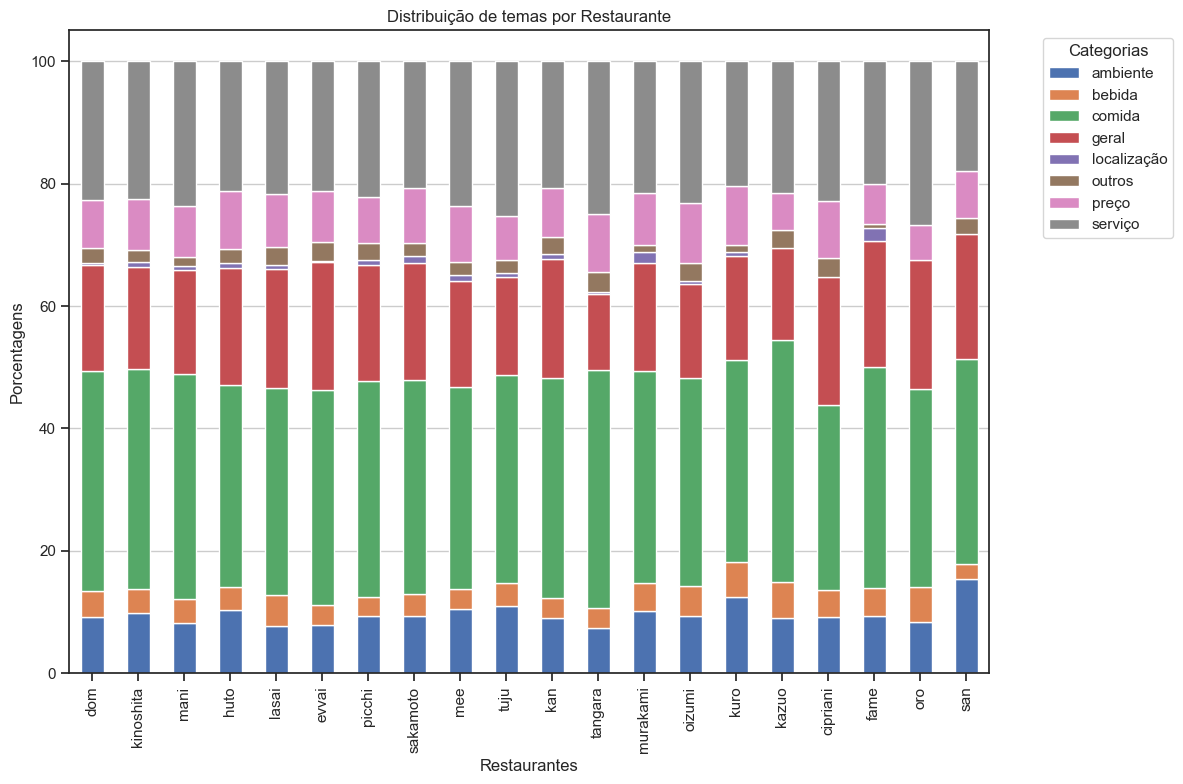

In [120]:
# Criar uma nova figura
plt.figure(figsize=(12, 8))

# Plotar gráfico de barras empilhadas
df_grafico.set_index('restaurante_name')[labels].plot(kind='bar', stacked=True, figsize=(12, 8))

# Configurar os rótulos dos eixos
plt.xlabel('Restaurantes')
plt.ylabel('Porcentagens')
plt.title('Distribuição de temas por Restaurante')

# Adicionar legenda
plt.legend(title='Categorias', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar uma grade
plt.grid(True, axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()